In [1]:
import numpy as np
import pandas as pd

In [2]:
my = pd.read_csv("Myntra Fasion Clothing.csv")
my.columns

C:\Users\santo\AppData\Local\Temp\ipykernel_9688\795321739.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  my = pd.read_csv("Myntra Fasion Clothing.csv")


Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews'],
      dtype='object')

In [3]:
my.drop(["URL" , "Product_id"] , axis = 1 , inplace=True) # Remove column

In [4]:
my.set_index("BrandName", inplace=True) # make a column as index

<AxesSubplot: ylabel='Category'>

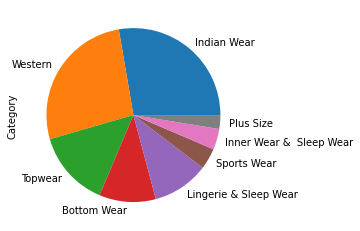

In [5]:
my["Category"].value_counts().plot(kind = "pie")

<AxesSubplot: >

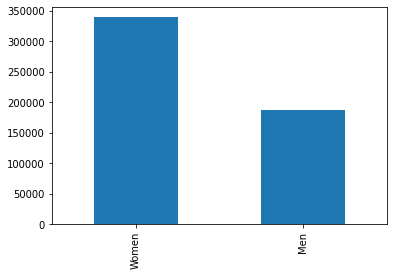

In [6]:
my["category_by_Gender"].value_counts().plot(kind = "bar")

In [7]:
id = my["Individual_category"].value_counts()
id

tshirts           61198
sarees            57915
tops              39126
kurtas            38984
dresses           35590
                  ...  
jewellery-set         2
hair-accessory        1
lungi                 1
bracelet              1
flip-flops            1
Name: Individual_category, Length: 92, dtype: int64

In [8]:
[my.groupby("category_by_Gender")["Individual_category"].unique()]

[category_by_Gender
 Men      [jeans, track-pants, shirts, trousers, tights,...
 Women    [shapewear, tshirts, tops, kurta-sets, jumpsui...
 Name: Individual_category, dtype: object]

In [9]:
my["Category"].unique()

array(['Bottom Wear', 'Topwear', 'Lingerie & Sleep Wear', 'Western',
       'Sports Wear', 'Indian Wear', 'Plus Size',
       'Inner Wear &  Sleep Wear'], dtype=object)

In [10]:
my.head(1)

,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
BrandName,,,,,,,,,,
Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0


In [11]:
my.isnull().sum()

Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64

In [12]:
my["discounts"] = my["OriginalPrice (in Rs)"] / my["DiscountPrice (in Rs)"] * 100

In [13]:
my.head(1)

,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews,discounts
BrandName,,,,,,,,,,,
Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0,181.917476


In [14]:
my["SizeOption"].str.split(",")

BrandName
Roadster            [28,  30,  32,  34,  36]
LOCOMOTIVE                  [S,  M,  L,  XL]
Roadster       [38,  40,  42,  44,  46,  48]
Zivame                [S,  M,  L,  XL,  XXL]
Roadster               [XS,  S,  M,  L,  XL]
                           ...              
H&M                         [XS,  S,  M,  L]
H&M                    [XS,  S,  M,  L,  XL]
250 DESIGNS           [S,  M,  L,  XL,  XXL]
Masaba                 [XS,  S,  M,  L,  XL]
Jockey                           [S,  M,  L]
Name: SizeOption, Length: 526564, dtype: object

In [15]:
my.head(1)

,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews,discounts
BrandName,,,,,,,,,,,
Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0,181.917476


In [16]:
size_28 = my[my["SizeOption"].str.split(",").apply(lambda x : "28" in x )]

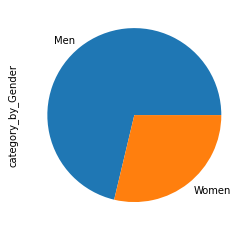

In [17]:
jeans = my[my["Individual_category"]=="jeans"]["category_by_Gender"].value_counts().plot(kind = "pie")

In [18]:
my.reset_index(inplace = True)

In [32]:
my.groupby(["BrandName", "category_by_Gender"])["Individual_category"].value_counts()

BrandName       category_by_Gender  Individual_category
1 Stop Fashion  Women               kurtas                 252
109F            Women               tops                    54
                                    dresses                 31
                                    shirts                   7
                                    trousers                 7
                                                          ... 
zink Z          Women               shorts                   2
                                    sweatshirts              2
                                    trousers                 2
                                    jumpsuit                 1
                                    skirts                   1
Name: Individual_category, Length: 12609, dtype: int64

In [39]:
my.groupby("BrandName").sum()["Reviews"].sort_values(ascending = False)

BrandName
Roadster                 1423637.0
Mast & Harbour            554536.0
HERE&NOW                  543534.0
HRX by Hrithik Roshan     378336.0
DressBerry                358985.0
                           ...    
Mizash                         0.0
Mizuno                         0.0
Mizzific                       0.0
Moda Chales                    0.0
zink Z                         0.0
Name: Reviews, Length: 2088, dtype: float64

In [40]:
my["Reviews"].max()

999.0

# Amazon

In [41]:
am = pd.read_csv("amazon.csv")
am.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [45]:
am.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64